In [51]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
c=json.load(open('pui.json'))
pl.rcParams.update(c)

Populating the interactive namespace from numpy and matplotlib


In [52]:
july2015= pd.read_csv('july2015.csv')

In [53]:
print july2015.columns
df=july2015

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [54]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

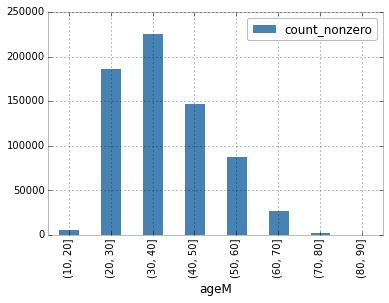

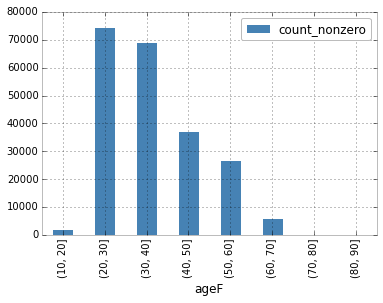

In [55]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.000753
(20, 30]       0.072901
(30, 40]       0.063428
(40, 50]       0.020371
(50, 60]       0.014432
(60, 70]       0.002502
(70, 80]       0.000320
(80, 90]       0.000000


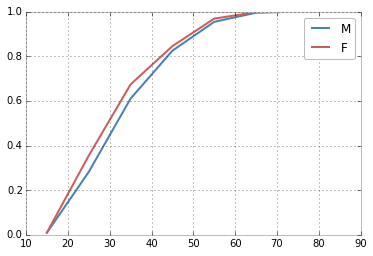

In [56]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [57]:
import scipy.stats

In [60]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.43313198412786136, 0.0)


In [62]:
ageM = np.array([a for a in df.ageM if not np.isnan(a)])
ageF = np.array([b for b in df.ageF if not np.isnan(b)])
new_ageM = np.random.choice(ageM, len(ageF), replace = False)
#scipy.stats.pearsonr(new_ageM, ageF)
print len(ageM)
print len(ageF)
pearsonr = scipy.stats.pearsonr(new_ageM,ageF)
print pearsonr

687252
217011
(0.0026326935445342256, 0.22004044118774119)


In [11]:
spearman =scipy.stats.spearmanr(df.ageM,df.ageF,axis=0)
print spearman

(-0.36204402355708326, 0.0)


In [12]:
df['date'] = pd.to_datetime(df['starttime'])

In [34]:
df['hour'] = df['date'].dt.hour

print df['hour']>6



0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1085646     True
1085647     True
1085648     True
1085649     True
1085650     True
1085651     True
1085652     True
1085653     True
1085654     True
1085655     True
1085656     True
1085657     True
1085658     True
1085659     True
1085660     True
1085661     True
1085662     True
1085663     True
1085664     True
1085665     True
1085666     True
1085667     True
1085668     True
1085669     True
1085670     True
1085671     True
1085672     True
1085673     Tr

In [37]:
df['N']=df['hour'][(df['hour']>6) | (df['hour']<18)]


In [40]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour']> 6) | (df['hour']<18))]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour']> 18) | (df['hour']<6))]

In [39]:
((df['hour']<3)|(df['hour']>0))
    



0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
1085646    True
1085647    True
1085648    True
1085649    True
1085650    True
1085651    True
1085652    True
1085653    True
1085654    True
1085655    True
1085656    True
1085657    True
1085658    True
1085659    True
1085660    True
1085661    True
1085662    True
1085663    True
1085664    True
1085665    True
1085666    True
1085667    True
1085668    True
1085669    True
1085670    True
1085671    True
1085672    True
1085673    True
1085674    True
1085675    True
Name: hour, dtype: bool

          count_nonzero
ageD                   
(10, 20]       0.003345
(20, 30]       0.068967
(30, 40]       0.076459
(40, 50]       0.041812
(50, 60]       0.012616
(60, 70]       0.001748
(70, 80]       0.000077
(80, 90]       0.000000


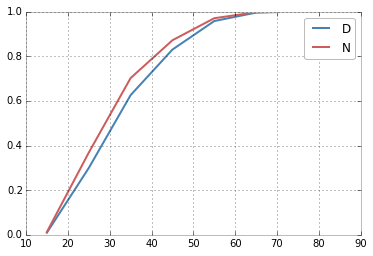

In [44]:
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.legend()

In [97]:
df.loc[1]

tripduration                                      322
starttime                           7/1/2015 00:00:06
stoptime                            7/1/2015 00:05:29
start station id                                  304
start station name              Broadway & Battery Pl
start station latitude                       40.70463
start station longitude                     -74.01362
end station id                                   3002
end station name           South End Ave & Liberty St
end station latitude                         40.71151
end station longitude                       -74.01576
bikeid                                          14618
usertype                                   Subscriber
birth year                                       1984
gender                                              1
date                              2015-07-01 00:00:06
hour                                                0
Name: 1, dtype: object

In [50]:
ageD = np.array([a for a in df.ageD if not np.isnan(a)])
ageN = np.array([b for b in df.ageN if not np.isnan(b)])
print 'PEARSON'
new_ageD = np.random.choice(ageD, len(ageN), replace = False)
scipy.stats.pearsonr(new_ageD, ageN)

(0.00052153553567651871, 0.8104659247323367)

as the test static is very less, we reject the null hypothesis that they come from the same sample

In [59]:
print 'KS'
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

print 'SPEARMANR'
spearman =scipy.stats.spearmanr(df.ageM,df.ageF,axis=0)
print spearman


KS
(0.43313198412786136, 0.0)
SPEARMANR
(-0.36204402355708326, 0.0)


For all the tests seen above we get very low values of the-less than 0 so we reject the hypothesis